In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="Ethereum Block Chain/My First Project-0723c678b6d6.json"
from google.cloud import bigquery
client = bigquery.Client()

In [2]:
ethereum_data_set_ref = client.dataset('crypto_ethereum', project = 'bigquery-public-data')

In [3]:
type(ethereum_data_set_ref)

google.cloud.bigquery.dataset.DatasetReference

In [4]:
ethereum_dataset = client.get_dataset(ethereum_data_set_ref)

In [5]:
type(ethereum_dataset)

google.cloud.bigquery.dataset.Dataset

In [6]:
[table.table_id for table in client.list_tables(ethereum_dataset)]

['amended_tokens',
 'balances',
 'blocks',
 'contracts',
 'logs',
 'token_transfers',
 'tokens',
 'traces',
 'transactions']

In [7]:
blocks = client.get_table(ethereum_dataset.table('blocks'))
type(blocks)

google.cloud.bigquery.table.Table

In [8]:
[command for command in dir(blocks) if not command.startswith('_')]

['clustering_fields',
 'created',
 'dataset_id',
 'description',
 'encryption_configuration',
 'etag',
 'expires',
 'external_data_configuration',
 'friendly_name',
 'from_api_repr',
 'from_string',
 'full_table_id',
 'labels',
 'location',
 'modified',
 'mview_enable_refresh',
 'mview_last_refresh_time',
 'mview_query',
 'mview_refresh_interval',
 'num_bytes',
 'num_rows',
 'partition_expiration',
 'partitioning_type',
 'path',
 'project',
 'range_partitioning',
 'reference',
 'require_partition_filter',
 'schema',
 'self_link',
 'streaming_buffer',
 'table_id',
 'table_type',
 'time_partitioning',
 'to_api_repr',
 'to_bqstorage',
 'view_query',
 'view_use_legacy_sql']

In [9]:
schema_subset = [col for col in blocks.schema if col.name in ('timestamp', 'number', 'size') ]
results = [x for x in client.list_rows(blocks,start_index=100,selected_fields=schema_subset,max_results=10)]

In [10]:
print(results)

[Row((datetime.datetime(2018, 12, 9, 2, 25, 32, tzinfo=<UTC>), 6852146, 14363), {'timestamp': 0, 'number': 1, 'size': 2}), Row((datetime.datetime(2018, 12, 9, 6, 32, 49, tzinfo=<UTC>), 6853178, 17556), {'timestamp': 0, 'number': 1, 'size': 2}), Row((datetime.datetime(2018, 12, 9, 16, 15, 55, tzinfo=<UTC>), 6855642, 30035), {'timestamp': 0, 'number': 1, 'size': 2}), Row((datetime.datetime(2018, 12, 9, 10, 4, 31, tzinfo=<UTC>), 6854079, 26309), {'timestamp': 0, 'number': 1, 'size': 2}), Row((datetime.datetime(2018, 12, 9, 23, 6, 47, tzinfo=<UTC>), 6857396, 30421), {'timestamp': 0, 'number': 1, 'size': 2}), Row((datetime.datetime(2018, 12, 9, 1, 26, 45, tzinfo=<UTC>), 6851911, 30733), {'timestamp': 0, 'number': 1, 'size': 2}), Row((datetime.datetime(2018, 12, 9, 5, 4, 6, tzinfo=<UTC>), 6852813, 16612), {'timestamp': 0, 'number': 1, 'size': 2}), Row((datetime.datetime(2018, 12, 9, 9, 16, 36, tzinfo=<UTC>), 6853908, 24987), {'timestamp': 0, 'number': 1, 'size': 2}), Row((datetime.datetime(2

In [11]:
for i in results:
    print(i)

Row((datetime.datetime(2018, 12, 9, 2, 25, 32, tzinfo=<UTC>), 6852146, 14363), {'timestamp': 0, 'number': 1, 'size': 2})
Row((datetime.datetime(2018, 12, 9, 6, 32, 49, tzinfo=<UTC>), 6853178, 17556), {'timestamp': 0, 'number': 1, 'size': 2})
Row((datetime.datetime(2018, 12, 9, 16, 15, 55, tzinfo=<UTC>), 6855642, 30035), {'timestamp': 0, 'number': 1, 'size': 2})
Row((datetime.datetime(2018, 12, 9, 10, 4, 31, tzinfo=<UTC>), 6854079, 26309), {'timestamp': 0, 'number': 1, 'size': 2})
Row((datetime.datetime(2018, 12, 9, 23, 6, 47, tzinfo=<UTC>), 6857396, 30421), {'timestamp': 0, 'number': 1, 'size': 2})
Row((datetime.datetime(2018, 12, 9, 1, 26, 45, tzinfo=<UTC>), 6851911, 30733), {'timestamp': 0, 'number': 1, 'size': 2})
Row((datetime.datetime(2018, 12, 9, 5, 4, 6, tzinfo=<UTC>), 6852813, 16612), {'timestamp': 0, 'number': 1, 'size': 2})
Row((datetime.datetime(2018, 12, 9, 9, 16, 36, tzinfo=<UTC>), 6853908, 24987), {'timestamp': 0, 'number': 1, 'size': 2})
Row((datetime.datetime(2018, 12, 

In [12]:
blocks_data = """
        SELECT * 
        FROM `bigquery-public-data.crypto_ethereum.blocks`
        LIMIT 10
        """   
blocks_data = client.query(blocks_data)
blocks_data_res = blocks_data.to_dataframe()

blocks_data_res

,timestamp,number,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,difficulty,total_difficulty,size,extra_data,gas_limit,gas_used,transaction_count
0,2016-12-02 15:58:13+00:00,2734801,0x300dfb2ac26a4b773299ab7d5a338e2024e1af6137aa...,0x6530e7263d928c103c91e51c8dda3d440bf55c04efed...,0x25d8c59001defdac,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000002000000000000...,0x7dc23e0f4f9adecb8e7d0865d5f2ef0b84702f619a68...,0xccb136ffdd875823e97fb25b421e3e688067cd4f9f44...,0x714e1ac5e76700d827452dd60a90ded20419976b3345...,0x96338149e9f6c262d4cb7aeec1cf4c652079a11c,71708761330307.000000000,97466862578974805773.000000000,2313,0x706172697479,3281053,412458,16
1,2016-12-02 15:06:02+00:00,2734593,0xbe87d17e260d338b5f82a05dee46d0fc67a6698ea851...,0x9e0be99f44ba9f6a9a665f3101641ff03c25fc0d36be...,0xc01079f5019bf92b,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x47cb525be795f2be8b3eab60b5bab41ee7780d6cb402...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x96338149e9f6c262d4cb7aeec1cf4c652079a11c,71986188936768.000000000,97451887308720203164.000000000,523,0x706172697479,3296779,0,0
2,2016-12-02 04:10:05+00:00,2731821,0xceeb6dc26dc684e297ac1e7ca5fcaf48ee4581b2879b...,0xae2dff1125e890e37b018b433703438ca7c11bf987ce...,0x6793d86134e05549,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0xcc3ab41588f94f2c7183f066ea0bceee078119ab154d...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x96338149e9f6c262d4cb7aeec1cf4c652079a11c,70748225044152.000000000,97256889481427679935.000000000,523,0x706172697479,3244660,0,0
3,2016-12-02 04:49:40+00:00,2731982,0xe233b1f7ea4df53c7dfab68c41a02dd1ad9e358309e5...,0x8a60a7fff2918dd7897428492faff541c41f2ecc940f...,0xb5f6443c5b8d35d7,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0xff038263b59d607783aa8548a91a2be48b42151024bf...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x96338149e9f6c262d4cb7aeec1cf4c652079a11c,70543554507913.000000000,97268228035143151456.000000000,523,0x706172697479,3296779,0,0
4,2016-12-02 10:07:01+00:00,2733307,0x41be79b273afb7d84771679f8e6b881e5614bf5e6185...,0xc013ba90714808e9fe152d4e509e20ca5860a190473b...,0xad62dc4002f19e6e,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x8e29f72b20087746d2ed08b3eda56af7b6a4da45df68...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x96338149e9f6c262d4cb7aeec1cf4c652079a11c,70362738836994.000000000,97360513812034933780.000000000,523,0x706172697479,3296779,0,0
5,2016-12-02 04:39:15+00:00,2731932,0x0ea42371b550ee77e3397b6fc52edb1718179ba67af8...,0x3d21e32ed66f487ca9af305a46a8abe8584139c9e5c0...,0x99f4b542d90cbcee,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x85d06cc39269955ea3c38594ee6001c2287a1bb2a8a6...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x96338149e9f6c262d4cb7aeec1cf4c652079a11c,70233049240589.000000000,97264707865357303297.000000000,523,0x706172697479,3294605,0,0
6,2016-12-02 11:43:35+00:00,2733713,0xbadd227c526c6ee20f47b8ab3d74bef5920436b1fbc1...,0xa116548e16a7048d5b8efdb43556cb111f53b165089f...,0xe4f2b9bc27afee6a,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x90b19682a36ced821ab687317fa5fa33b9939f97c90e...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x96338149e9f6c262d4cb7aeec1cf4c652079a11c,70130595204771.000000000,97388948584241811208.000000000,523,0x706172697479,3296779,0,0
7,2016-12-02 11:20:19+00:00,2733603,0x51f8487e161cf3f5

In [13]:
transactions = client.get_table(ethereum_dataset.table('transactions'))
transactions.schema

[SchemaField('hash', 'STRING', 'REQUIRED', 'Hash of the transaction', (), None),
 SchemaField('nonce', 'INTEGER', 'REQUIRED', 'The number of transactions made by the sender prior to this one', (), None),
 SchemaField('transaction_index', 'INTEGER', 'REQUIRED', 'Integer of the transactions index position in the block', (), None),
 SchemaField('from_address', 'STRING', 'REQUIRED', 'Address of the sender', (), None),
 SchemaField('to_address', 'STRING', 'NULLABLE', 'Address of the receiver. null when its a contract creation transaction', (), None),
 SchemaField('value', 'NUMERIC', 'NULLABLE', 'Value transferred in Wei', (), None),
 SchemaField('gas', 'INTEGER', 'NULLABLE', 'Gas provided by the sender', (), None),
 SchemaField('gas_price', 'INTEGER', 'NULLABLE', 'Gas price provided by the sender in Wei', (), None),
 SchemaField('input', 'STRING', 'NULLABLE', 'The data sent along with the transaction', (), None),
 SchemaField('receipt_cumulative_gas_used', 'INTEGER', 'NULLABLE', 'The total 

In [14]:
contracts = client.get_table(ethereum_dataset.table('contracts'))
contracts.schema

[SchemaField('address', 'STRING', 'REQUIRED', 'Address of the contract', (), None),
 SchemaField('bytecode', 'STRING', 'NULLABLE', 'Bytecode of the contract', (), None),
 SchemaField('function_sighashes', 'STRING', 'REPEATED', '4-byte function signature hashes', (), None),
 SchemaField('is_erc20', 'BOOLEAN', 'NULLABLE', 'Whether this contract is an ERC20 contract', (), None),
 SchemaField('is_erc721', 'BOOLEAN', 'NULLABLE', 'Whether this contract is an ERC721 contract', (), None),
 SchemaField('block_timestamp', 'TIMESTAMP', 'REQUIRED', 'Timestamp of the block where this contract was created', (), None),
 SchemaField('block_number', 'INTEGER', 'REQUIRED', 'Block number where this contract was created', (), None),
 SchemaField('block_hash', 'STRING', 'REQUIRED', 'Hash of the block where this contract was created', (), None)]

In [15]:
token_transfers = client.get_table(ethereum_dataset.table('token_transfers'))
token_transfers.schema

[SchemaField('token_address', 'STRING', 'REQUIRED', 'ERC20 token address', (), None),
 SchemaField('from_address', 'STRING', 'NULLABLE', 'Address of the sender', (), None),
 SchemaField('to_address', 'STRING', 'NULLABLE', 'Address of the receiver', (), None),
 SchemaField('value', 'STRING', 'NULLABLE', 'Amount of tokens transferred (ERC20) / id of the token transferred (ERC721). Use safe_cast for casting to NUMERIC or FLOAT64', (), None),
 SchemaField('transaction_hash', 'STRING', 'REQUIRED', 'Transaction hash', (), None),
 SchemaField('log_index', 'INTEGER', 'REQUIRED', 'Log index in the transaction receipt', (), None),
 SchemaField('block_timestamp', 'TIMESTAMP', 'REQUIRED', 'Timestamp of the block where this transfer was in', (), None),
 SchemaField('block_number', 'INTEGER', 'REQUIRED', 'Block number where this transfer was in', (), None),
 SchemaField('block_hash', 'STRING', 'REQUIRED', 'Hash of the block where this transfer was in', (), None)]

In [16]:
tokens = client.get_table(ethereum_dataset.table('tokens'))
tokens.schema

[SchemaField('address', 'STRING', 'REQUIRED', 'The address of the ERC20 token', (), None),
 SchemaField('symbol', 'STRING', 'NULLABLE', 'The symbol of the ERC20 token', (), None),
 SchemaField('name', 'STRING', 'NULLABLE', 'The name of the ERC20 token', (), None),
 SchemaField('decimals', 'STRING', 'NULLABLE', 'The number of decimals the token uses. Use safe_cast for casting to NUMERIC or FLOAT64', (), None),
 SchemaField('total_supply', 'STRING', 'NULLABLE', 'The total token supply. Use safe_cast for casting to NUMERIC or FLOAT64', (), None),
 SchemaField('block_timestamp', 'TIMESTAMP', 'REQUIRED', 'Timestamp of the block where this token was created', (), None),
 SchemaField('block_number', 'INTEGER', 'REQUIRED', 'Block number where this token was created', (), None),
 SchemaField('block_hash', 'STRING', 'REQUIRED', 'Hash of the block where this token was created', (), None)]

In [17]:
blocks = client.get_table(ethereum_dataset.table('blocks'))
blocks.schema

[SchemaField('timestamp', 'TIMESTAMP', 'REQUIRED', 'The timestamp for when the block was collated', (), None),
 SchemaField('number', 'INTEGER', 'REQUIRED', 'The block number', (), None),
 SchemaField('hash', 'STRING', 'REQUIRED', 'Hash of the block', (), None),
 SchemaField('parent_hash', 'STRING', 'NULLABLE', 'Hash of the parent block', (), None),
 SchemaField('nonce', 'STRING', 'REQUIRED', 'Hash of the generated proof-of-work', (), None),
 SchemaField('sha3_uncles', 'STRING', 'NULLABLE', 'SHA3 of the uncles data in the block', (), None),
 SchemaField('logs_bloom', 'STRING', 'NULLABLE', 'The bloom filter for the logs of the block', (), None),
 SchemaField('transactions_root', 'STRING', 'NULLABLE', 'The root of the transaction trie of the block', (), None),
 SchemaField('state_root', 'STRING', 'NULLABLE', 'The root of the final state trie of the block', (), None),
 SchemaField('receipts_root', 'STRING', 'NULLABLE', 'The root of the receipts trie of the block', (), None),
 SchemaField(

In [18]:
# highest transactions 

higest_transactions = """
        SELECT timestamp as block_time, transaction_count   
        FROM `bigquery-public-data.crypto_ethereum.blocks`
        ORDER BY transaction_count DESC
        LIMIT 10
        """   
higest_transactions = client.query(higest_transactions)
higest_transactions_res = higest_transactions.to_dataframe()

higest_transactions_res

,block_time,transaction_count
0,2021-01-19 01:35:45+00:00,596
1,2021-01-09 04:24:16+00:00,596
2,2021-01-08 03:55:14+00:00,596
3,2021-01-09 04:38:32+00:00,595
4,2020-10-20 03:27:33+00:00,595
5,2020-12-17 03:17:45+00:00,595
6,2020-12-29 03:20:16+00:00,595
7,2021-01-20 01:28:02+00:00,595
8,2020-12-19 01:54:07+00:00,595
9,2021-01-08 01:39:42+00:00,595


In [19]:
# most gas spent

most_gas_spent = """
                SELECT timestamp as block_time, gas_used
                FROM `bigquery-public-data.crypto_ethereum.blocks`
                ORDER BY gas_used DESC
                LIMIT 10
                """

most_gas_spent = client.query(most_gas_spent)
most_gas_spent_res = most_gas_spent.to_dataframe()
most_gas_spent_res

,block_time,gas_used
0,2021-01-28 13:45:44+00:00,12654494
1,2021-01-28 13:45:19+00:00,12653529
2,2021-01-28 13:43:20+00:00,12652702
3,2021-01-28 13:46:20+00:00,12652041
4,2021-01-28 13:44:34+00:00,12644434
5,2021-01-28 13:44:55+00:00,12643329
6,2021-01-28 13:45:51+00:00,12641904
7,2021-01-28 13:42:58+00:00,12640968
8,2021-01-28 13:43:09+00:00,12640464
9,2021-01-28 13:44:09+00:00,12638960


In [20]:
# average gas wastage

avg_gas_wastage = """
            SELECT AVG(gas_limit - gas_used) as average_gas_wastage
            FROM bigquery-public-data.crypto_ethereum.blocks
            """

avg_gas_wastage = client.query(avg_gas_wastage)
avg_gas_wastage_res = avg_gas_wastage.to_dataframe()
avg_gas_wastage_res

,average_gas_wastage
0,2.042179e+06


In [34]:
# average ether transaction over last 2 years

avg_gas_transaction = """
                    SELECT AVG(gas_price * (receipt_gas_used/POWER(10,18))) as avg_gas_price,
                    SUM(value/POWER(10,18)) sum_of_transaction_value , DATE(timestamp) as transaction_date
                    FROM bigquery-public-data.crypto_ethereum.transactions,
                    bigquery-public-data.crypto_ethereum.blocks
                    WHERE
                    transactions.block_number = blocks.number
                    AND receipt_status = 1
                    AND value > 0
                    GROUP BY timestamp
                    HAVING timestamp >= '2019-01-01' AND timestamp <= '2020-12-31'
                    ORDER BY avg_gas_price DESC
                    """

avg_gas_transaction = client.query(avg_gas_transaction)
avg_gas_transaction_res = avg_gas_transaction.to_dataframe()
avg_gas_transaction_res

,avg_gas_price,sum_of_transaction_value,transaction_date
0,166.700871,5.571185e+01,2020-06-10
1,156.894268,6.073497e+02,2020-06-11
2,84.000580,1.005255e+02,2019-03-18
3,48.126139,3.283964e+03,2020-06-11
4,23.864194,1.646201e+03,2019-02-19
...,...,...,...
4419096,0.000000,1.198800e-12,2019-01-17
4419097,0.000000,1.100000e-14,2020-06-23
4419098,0.000000,2.100000e-14,2019-06-12
4419099,0.000000,2.100000e-14,2019-05-18


<AxesSubplot:xlabel='transaction_date'>

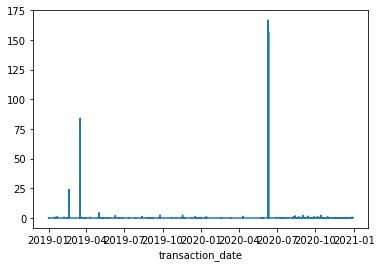

In [35]:
avg_gas_transaction_res.set_index('transaction_date')['avg_gas_price'].plot.line()

In [45]:
# How should I start with ethereum transactions?

# to answer these question first the following questions must be answered.

# What is the average gas prices in  past month? 
# Is the average gas price increasing daily? should we wait for the gas prices to drop?
# What is the average transactions done by people every day? and according to that how much a beginner should transact?
# What is the amount of gas we should invest without having the transaction failed and also spending the least amount of gas?

# average transaction values in wei in the blocks in past 30 days of ERC20 contracts.

avg_transaction_values = """
                        SELECT AVG(gas_price * (receipt_gas_used/POWER(10,18))) as avg_gas_price,
                        AVG(transactions.value/POWER(10,18)) as avg_token_values ,
                        SUM(transaction_count) as total_transactions,
                        DATE(timestamp) as date,
                        FROM
                        bigquery-public-data.crypto_ethereum.transactions,
                        bigquery-public-data.crypto_ethereum.blocks,
                        bigquery-public-data.crypto_ethereum.token_transfers
                        WHERE
                        transactions.block_number = blocks.number
                        AND token_transfers.block_number = blocks.number
                        AND transactions.value > 0
                        AND receipt_status = 1
                        GROUP BY timestamp
                        HAVING timestamp >= '2021-01-01'
                        ORDER BY timestamp
                        """

avg_transaction_values = client.query(avg_transaction_values)
avg_transaction_values_res = avg_transaction_values.to_dataframe()
avg_transaction_values_res

,avg_gas_price,avg_token_values,total_transactions,date
0,0.003720,2.667476,2432000,2021-01-31
1,0.004211,1.145598,2183244,2021-01-31
2,0.003149,1.696515,2835924,2021-01-31
3,0.003382,6.276248,2980720,2021-01-31
4,0.002886,1.181060,1907490,2021-01-31
...,...,...,...,...
7142736,0.000790,141.217888,15120,2017-10-16
7142737,0.000602,90.470828,187128,2017-10-16
7142738,0.001318,0.305988,24544,2017-10-16
7142739,0.000935,19.227356,116200,2017-10-16
